In [198]:
#defining imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets
from keras.layers import Dense
from keras.layers import Conv2D, Layer
from keras import backend as K

In [199]:
#defining training and testing datasets
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

In [200]:
#adding 4th dimension as 1 to declare as grayscale image
#normalizing the images
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train / 255.0
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test / 255.0

Defining our model

In [201]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    #tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [202]:
# compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [203]:
#extracting initial filter matrices

filter_matrices = []
for layer in model.layers:
    if isinstance(layer, Conv2D):
        weights, biases = layer.get_weights()
        filter_matrices.append(weights)
        
filter_matrices[0]

array([[[[ 0.05975443,  0.12782346,  0.11761676, -0.05013395,
           0.03442466, -0.13823664, -0.00988561, -0.10521956,
          -0.10396427, -0.10671988, -0.11833755, -0.0604212 ,
           0.04074885,  0.09100331,  0.10048857,  0.14021327,
           0.02877808,  0.10112013,  0.06662062,  0.09763116,
           0.09128375, -0.05774742, -0.10526028,  0.02593334,
          -0.12156416,  0.03712857,  0.05012266,  0.02831434,
           0.07626234,  0.00107576,  0.11107959,  0.11741544]],

        [[-0.03315745,  0.02357779,  0.12068255, -0.02125461,
          -0.12228125, -0.02519693, -0.0743916 ,  0.02612337,
           0.07641704,  0.02692319, -0.10783485, -0.04875653,
          -0.1339607 , -0.13453987, -0.01112969, -0.05662558,
           0.00968565, -0.08654933,  0.04785797, -0.04254685,
           0.06445901, -0.09722275,  0.05958948, -0.05455463,
           0.09835845, -0.07209512,  0.01638266, -0.07143794,
           0.0548794 ,  0.06179476,  0.01708847,  0.07744163]],

  

In [204]:
# Train the model and display the activations after each epoch
start_time = time.time()
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))
end_time = time.time()

1875/1875 [==============================] - 13s 7ms/step - loss: 10.2793 - accuracy: 0.0948 - val_loss: 9.9819 - val_accuracy: 0.0980


In [205]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

313/313 - 1s - loss: 9.9819 - accuracy: 0.0980 - 1s/epoch - 3ms/step
Test accuracy: 0.09799999743700027
Time elapsed:  13.180322647094727


Filter Matrix Extraction and Filter Activations


In [217]:
filter_matrices = []
filter_activations = [] 
for layer in model.layers:
    if isinstance(layer, Conv2D):
        weights, biases = layer.get_weights()
        filter_matrices.append(weights)
        
        activation_func = K.function([model.input], [layer.output])
        activations = np.mean(activation_func([x_train]), axis=(0, 1, 2))
        filter_activations.append(activations)

In [218]:
filter_matrices


[array([[[[ 2.04589479e-02,  2.57810093e-02,  2.57665999e-02,
           -9.61082429e-02,  1.47982955e-03, -1.59636810e-01,
           -3.94113436e-02, -1.41600236e-01, -1.53591022e-01,
           -1.47732988e-01, -1.67938665e-01, -8.21674764e-02,
            8.39127693e-03,  3.17507759e-02,  3.05217057e-02,
            2.98862625e-02, -7.57475034e-04,  1.03135314e-02,
           -1.76218655e-02,  2.15920527e-02,  3.26602869e-02,
           -8.19685459e-02, -1.42970577e-01, -3.44718583e-02,
           -1.51004508e-01, -3.51622291e-02, -1.34224929e-02,
           -3.61846834e-02,  1.14525575e-02, -3.57796326e-02,
            3.38423960e-02,  3.71572040e-02]],
 
         [[-7.15915412e-02, -7.44935945e-02,  2.86705140e-02,
           -5.52516133e-02, -1.38843969e-01, -4.55303118e-02,
           -9.44391787e-02, -1.46816289e-02, -6.37533935e-03,
           -4.21246253e-02, -1.35118783e-01, -5.98957092e-02,
           -1.70020729e-01, -1.63217083e-01, -7.48037323e-02,
           -1.2999527

In [222]:
filter_activations

[array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000

In [223]:
# Step 3: Rank Filters based on their mean of activation values in the feature map

filter_ranks = np.argsort(filter_activations)
filter_ranks

array([[[ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 30, 31],
        [ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 30, 31],
        [ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 30, 31],
        [ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 30, 31],
        [ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 30, 31],
        [ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 30, 31],
        [ 0, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6, 

In [230]:
# Step 4: Prune Filters
num_filters_to_keep = 32  # Number of filters to keep
        
if isinstance(model.layers[0], tf.keras.layers.Conv2D):
    weights, biases = model.layers[0].get_weights()
    pruned_weights = weights[:, :, :, filter_ranks[-num_filters_to_keep:]]
    pruned_biases = biases[filter_ranks[-num_filters_to_keep:]]
    #model.layers[0].set_weights([pruned_weights, pruned_biases])

        
pruned_biases.shape
pruned_weights.shape


(3, 3, 1, 1, 26, 32)

STOP
STOP
STOP
STOP
STOP
STOP

In [ ]:

def plot_sample(x, y, index):
    plt.figure(figsize = (1,25))
    plt.imshow(x[index])
    #plt.xlabel(classes[y[index]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


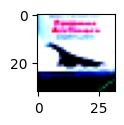

In [ ]:
plot_sample(x_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:

# Extracts the outputs of the top 10 layers
layer_outputs = [layer.output for layer in model.layers[:10]] 

#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

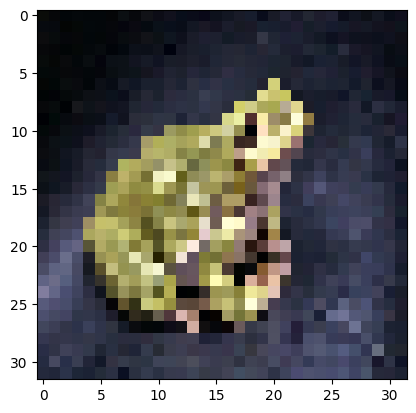

(1, 32, 32, 3)


In [ ]:

img_path = 'frog.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(28, 28))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)
     

In [ ]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

1/1 [==============================] - 0s 93ms/step


In [ ]:

print(first_layer_activation.shape)

(1, 32, 32, 3)


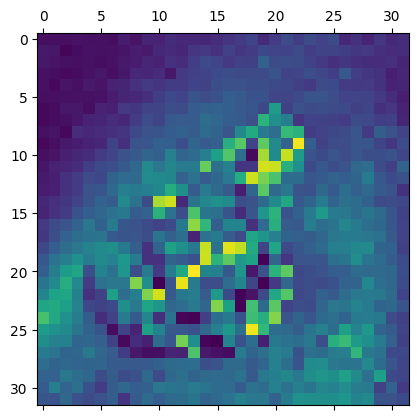

In [ ]:
plt.matshow(first_layer_activation[0, :,:,2], cmap='viridis')

/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_20398/1137690709.py:29: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_20398/1137690709.py:18: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_20398/1137690709.py:18: RuntimeWarning: divide by zero encountered in divide
  channel_image /= channel_image.std()


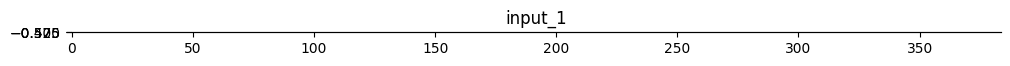

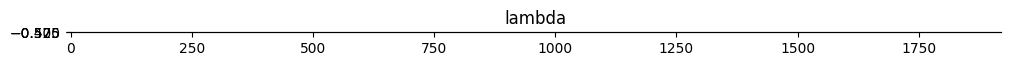

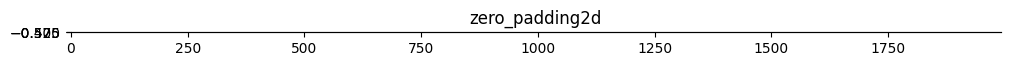

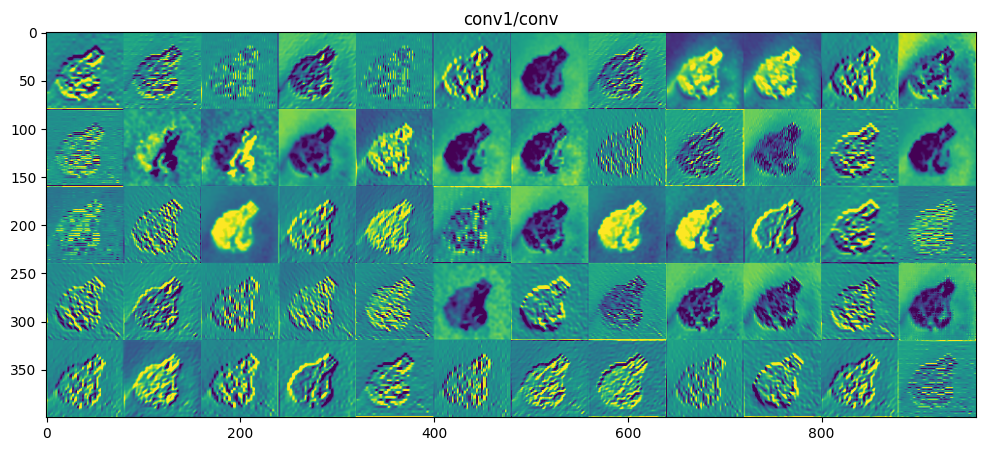

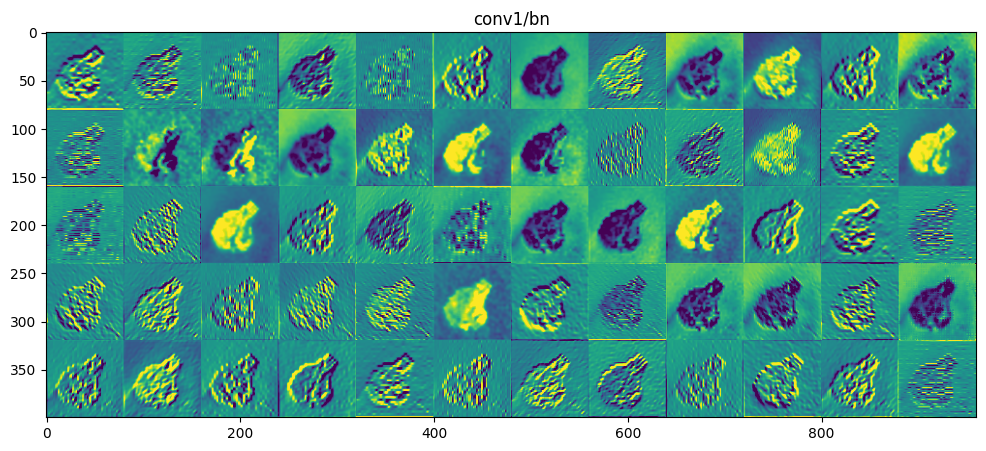

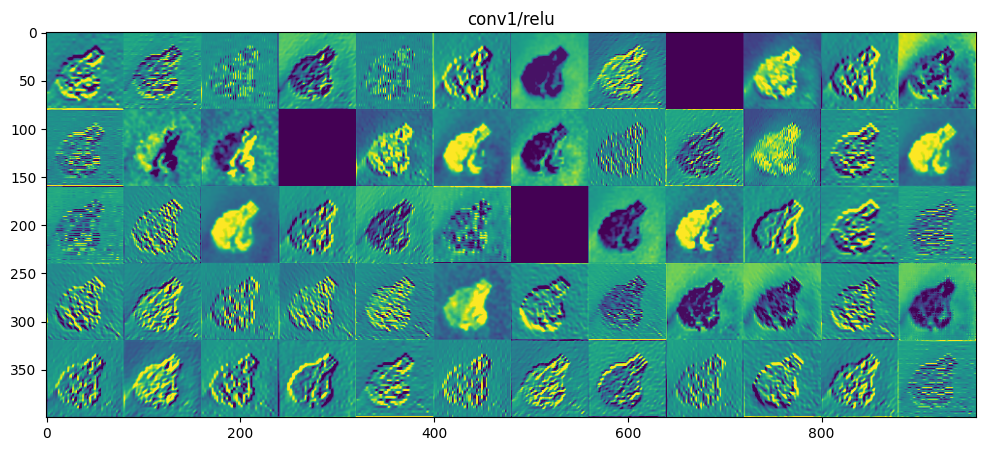

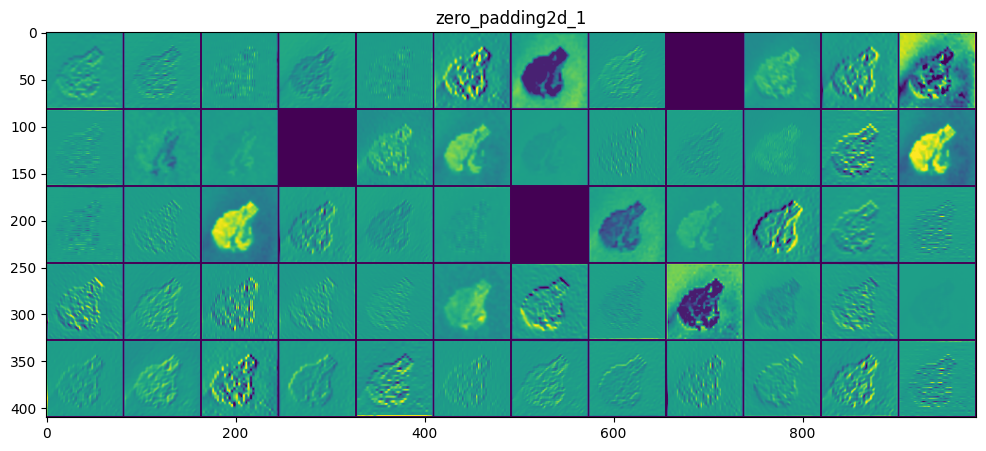

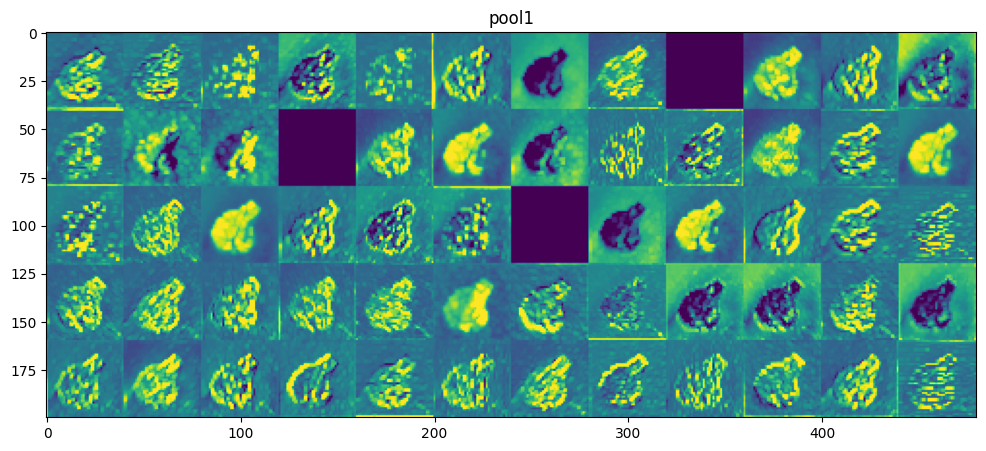

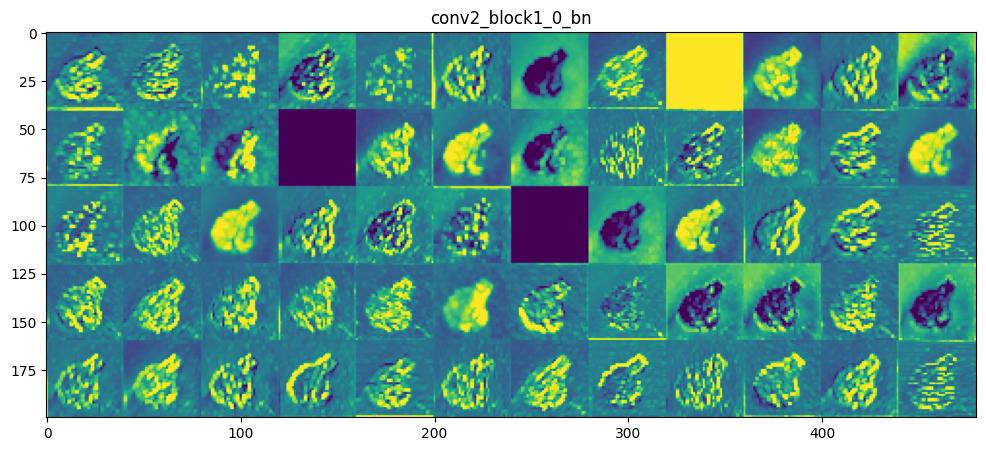

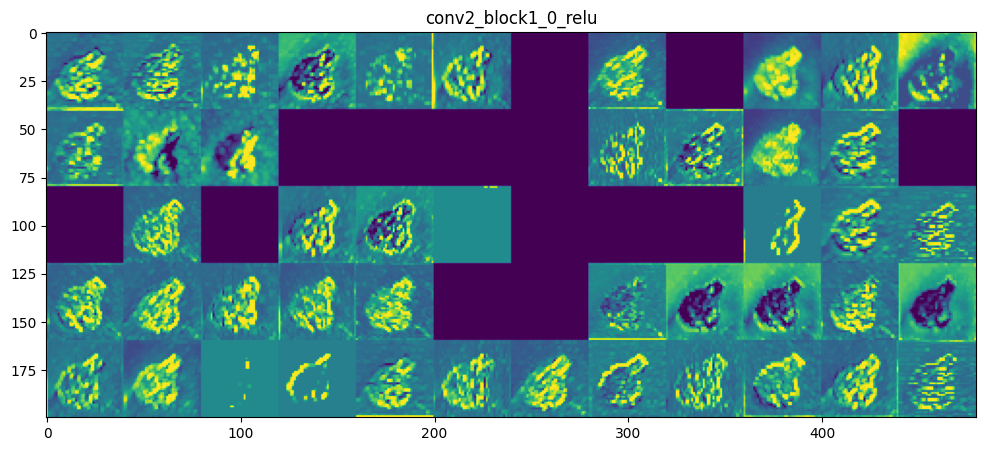

In [ ]:

layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 12

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
     